In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Question 1

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

## Question 2

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

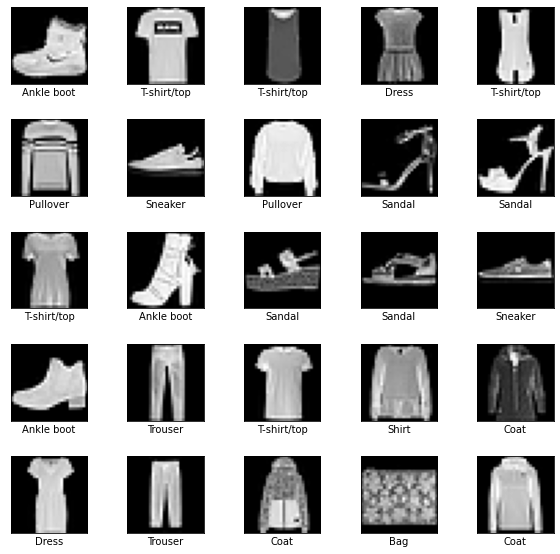

In [ ]:
fig = plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap = 'gray', interpolation=None)
    plt.xlabel(class_names[y_train[i]])
    plt.xticks([])
    plt.yticks([])

## Question 3

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_test.shape

(10000, 28, 28, 1)

## Question 4

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation, BatchNormalization

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', strides=(1,1), input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=30, batch_size=1000, validation_data=(X_test, y_test))

Epoch 1/30
60/60 [==============================] - 1s 11ms/step - loss: 0.6892 - accuracy: 0.7689 - val_loss: 0.4666 - val_accuracy: 0.8347
Epoch 2/30
60/60 [==============================] - 0s 8ms/step - loss: 0.4096 - accuracy: 0.8577 - val_loss: 0.4006 - val_accuracy: 0.8598
Epoch 3/30
60/60 [==============================] - 0s 8ms/step - loss: 0.3634 - accuracy: 0.8738 - val_loss: 0.3686 - val_accuracy: 0.8703
Epoch 4/30
60/60 [==============================] - 0s 8ms/step - loss: 0.3329 - accuracy: 0.8848 - val_loss: 0.3407 - val_accuracy: 0.8787
Epoch 5/30
60/60 [==============================] - 1s 8ms/step - loss: 0.3112 - accuracy: 0.8920 - val_loss: 0.3287 - val_accuracy: 0.8826
Epoch 6/30
60/60 [==============================] - 0s 8ms/step - loss: 0.2962 - accuracy: 0.8962 - val_loss: 0.3226 - val_accuracy: 0.8844
Epoch 7/30
60/60 [==============================] - 0s 8ms/step - loss: 0.2799 - accuracy: 0.9023 - val_loss: 0.3027 - val_accuracy: 0.8923
Epoch 8/30
60/60 [=

## Question 5

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', strides=(1,1), input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()
model.fit(X_train, y_train, epochs=30, batch_size=1000, validation_data=(X_test, y_test))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
60/60 [==============================] - 1s 10ms/step - loss: 0.7339 - accuracy: 0.7513 - val_loss: 0.5

## Question 6

In [ ]:
model.save('my_model.h5')

In [ ]:
load_saved_model = tf.keras.models.load_model('my_model.h5')

In [ ]:
Accuracy = load_saved_model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (Accuracy[1]*100))

Accuracy: 90.99%


## Question 7

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
pred = np.argmax(y_test, axis=1)

In [ ]:
print(classification_report(pred, predictions))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1000
           1       0.98      0.98      0.98      1000
           2       0.88      0.83      0.86      1000
           3       0.95      0.86      0.90      1000
           4       0.83      0.88      0.85      1000
           5       0.98      0.98      0.98      1000
           6       0.74      0.77      0.76      1000
           7       0.96      0.97      0.96      1000
           8       0.97      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [ ]:
cm = confusion_matrix(pred, predictions)
print(cm)

[[880   0  13  12   3   1  82   0   9   0]
 [  2 983   0   6   4   0   3   0   2   0]
 [ 17   2 835   5  60   1  78   0   2   0]
 [ 23  11   9 865  52   0  34   0   6   0]
 [  1   1  44  10 877   0  66   0   1   0]
 [  0   0   0   0   0 979   0  13   0   8]
 [111   1  42  15  54   0 769   0   8   0]
 [  0   0   0   0   0  12   0 967   1  20]
 [  4   0   3   1   2   2   3   2 983   0]
 [  1   0   0   0   0   8   0  30   0 961]]


## Question 8

In [ ]:
MisClassification = X_train.shape[0] - np.sum(np.diag(cm))
MisClassification

50901

## Question 9

In [ ]:
Epochs = [10,30,50]
Batch_Size = [500,1000, 5000] 
Optimizer = ['adam', 'Rmsprop', 'SGD']
dict = {}
for i in Optimizer:
  for j in Epochs:
    for k in Batch_Size:
      model = Sequential()
      model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape= (28,28,1)))
      model.add(MaxPooling2D(pool_size=(2, 2)))
      model.add(Flatten())
      model.add(Dense(128, activation='relu'))
      model.add(Dense(10, activation='softmax'))
      model.compile(optimizer=i,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
      model.fit(X_train, y_train,
          batch_size=k,
          epochs=j)
      scores = model.evaluate(X_test, y_test, verbose=0)
      dict[i+str(j)+str(k)] = scores[1]
dict

Epoch 1/10
120/120 [==============================] - 1s 5ms/step - loss: 0.5812 - accuracy: 0.8044
Epoch 2/10
120/120 [==============================] - 1s 5ms/step - loss: 0.3573 - accuracy: 0.8751
Epoch 3/10
120/120 [==============================] - 1s 5ms/step - loss: 0.3133 - accuracy: 0.8902
Epoch 4/10
120/120 [==============================] - 1s 5ms/step - loss: 0.2878 - accuracy: 0.8981
Epoch 5/10
120/120 [==============================] - 1s 5ms/step - loss: 0.2695 - accuracy: 0.9037
Epoch 6/10
120/120 [==============================] - 1s 5ms/step - loss: 0.2530 - accuracy: 0.9094
Epoch 7/10
120/120 [==============================] - 1s 5ms/step - loss: 0.2385 - accuracy: 0.9150
Epoch 8/10
120/120 [==============================] - 1s 5ms/step - loss: 0.2264 - accuracy: 0.9181
Epoch 9/10
120/120 [==============================] - 1s 5ms/step - loss: 0.2134 - accuracy: 0.9237
Epoch 10/10
120/120 [==============================] - 1s 5ms/step - loss: 0.2043 - accuracy: 0.9264

{'Rmsprop101000': 0.8981000185012817,
 'Rmsprop10500': 0.9070000052452087,
 'Rmsprop105000': 0.8471999764442444,
 'Rmsprop301000': 0.9211999773979187,
 'Rmsprop30500': 0.9156000018119812,
 'Rmsprop305000': 0.8927000164985657,
 'Rmsprop501000': 0.9115999937057495,
 'Rmsprop50500': 0.9204999804496765,
 'Rmsprop505000': 0.9031999707221985,
 'SGD101000': 0.7843000292778015,
 'SGD10500': 0.8173999786376953,
 'SGD105000': 0.6510000228881836,
 'SGD301000': 0.8101999759674072,
 'SGD30500': 0.826200008392334,
 'SGD305000': 0.7634999752044678,
 'SGD501000': 0.8422999978065491,
 'SGD50500': 0.86080002784729,
 'SGD505000': 0.7872999906539917,
 'adam101000': 0.8942000269889832,
 'adam10500': 0.9004999995231628,
 'adam105000': 0.8780999779701233,
 'adam301000': 0.9120000004768372,
 'adam30500': 0.9194999933242798,
 'adam305000': 0.894599974155426,
 'adam501000': 0.9158999919891357,
 'adam50500': 0.9128000140190125,
 'adam505000': 0.90420001745224}

In [ ]:
dict

{'Rmsprop101000': 0.8981000185012817,
 'Rmsprop10500': 0.9070000052452087,
 'Rmsprop105000': 0.8471999764442444,
 'Rmsprop301000': 0.9211999773979187,
 'Rmsprop30500': 0.9156000018119812,
 'Rmsprop305000': 0.8927000164985657,
 'Rmsprop501000': 0.9115999937057495,
 'Rmsprop50500': 0.9204999804496765,
 'Rmsprop505000': 0.9031999707221985,
 'SGD101000': 0.7843000292778015,
 'SGD10500': 0.8173999786376953,
 'SGD105000': 0.6510000228881836,
 'SGD301000': 0.8101999759674072,
 'SGD30500': 0.826200008392334,
 'SGD305000': 0.7634999752044678,
 'SGD501000': 0.8422999978065491,
 'SGD50500': 0.86080002784729,
 'SGD505000': 0.7872999906539917,
 'adam101000': 0.8942000269889832,
 'adam10500': 0.9004999995231628,
 'adam105000': 0.8780999779701233,
 'adam301000': 0.9120000004768372,
 'adam30500': 0.9194999933242798,
 'adam305000': 0.894599974155426,
 'adam501000': 0.9158999919891357,
 'adam50500': 0.9128000140190125,
 'adam505000': 0.90420001745224}